In [2]:
from netCDF4 import Dataset
import netCDF4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from datetime import datetime, timezone

atmos_epoch = datetime(1900, 1, 1, 0, 0, tzinfo=timezone.utc)

In [3]:
# 5535x281x1440 (geopotential height) 281x1440 (lat, long)
observational_geopotential = Dataset('../data/original/geopotential_height_500hPa_era5_6hourly_z0001_daymean.nc', mode='r')
# ukesm_data_full = Dataset('data/500zg_1x1_1979-2019_12hr_NHML.nc', mode='r')

# 4264
observational_labels = Dataset('../data/labels/GTD_1979-2019_JJAextd.nc', mode='r')
ukesm_labels = Dataset('../data/labels/GTD_UKESM1-0-LL_piControl_1960-2060_JJAextd.nc', mode='r')

In [4]:
long = observational_geopotential.variables['longitude']
lat = observational_geopotential.variables['latitude']
zg = observational_geopotential.variables['z_0001']
time_raw = observational_geopotential.variables["time"]
time = netCDF4.num2date(time_raw[:], time_raw.units, time_raw.calendar)

In [5]:
# replace last data entries with a year prior to fill blank entries for 01.07.2023 - 31.09.2023 (5473-5535)
# with time range 01.07.2022 - 31.09.2022 (5350-5412)

# quick fix: remove last year

# zg_cut = zg[:-123]
for _ in range(123):
    zg.pop()

# zg[5473:5535] = zg[5350:5412]

AttributeError: NetCDF: Attribute not found

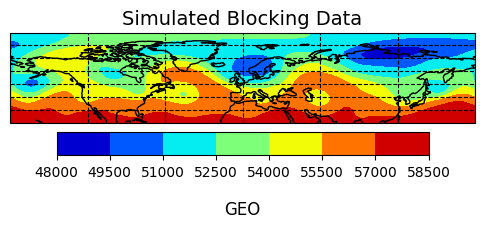

In [155]:
# plot observational data onto worldmap

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

plt.contourf(long[:], lat[:], zg[0], transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Simulated Blocking Data', size=14)
cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('GEO',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

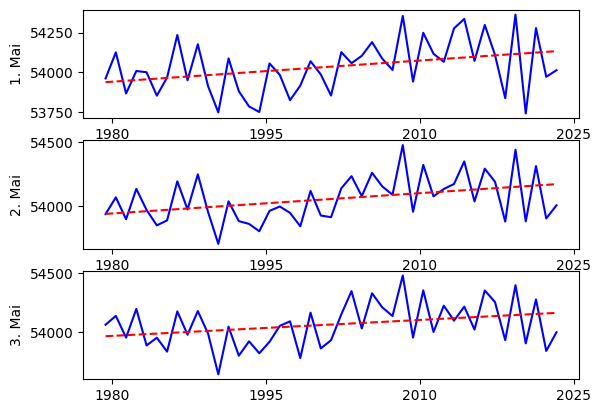

In [156]:
num = 3
width = 3
for i in range(num):
    y = np.mean(zg[i::123], axis=(1, 2))
    tmp_time = time[i::123]
    x = np.arange(len(y))
    # sns.regplot(x=range(40), y=zg[::123, 0, 0], ci=False, line_kws={'color':'red'});
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef) 
    # poly1d_fn is now a function which takes in x and returns an estimate for y

    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time[i].day) + ". Mai")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
plt.show()

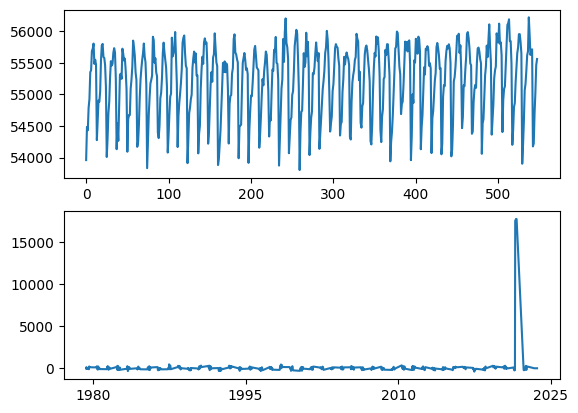

In [157]:
# whole data plotted to look at long-term trends for mean of whole grid

plt.subplot(2, 1, 1)
plt.plot(np.mean(zg[::10], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.plot(time[::10], np.mean(zg_mean[::10], axis=(1, 2)))

plt.show()

In [171]:
mean_mask = np.array(np.zeros((123, len(lat), len(long))))
zg_mean = np.array(np.zeros((len(time), len(lat), len(long))))

years = len(time) / 123 # number of days per year

# for j in range(2):
#     offset = 123 * j
#     for i in range(123):
#         mean_mask[i] = np.mean([zg[offset + i], zg[offset + 123 + i], zg[offset + 123 * 2 + i], zg[offset + 123 * 3 + i], zg[offset + 123 * 4 + i]])
#         zg_mean[offset + i] = np.subtract(zg[offset + i], mean_mask[i])

# for j in range(2, 43):
for j in range(42, 43):
    offset = 123 * j
    for i in range(123):
        mean_mask[i] = np.mean([zg[offset + i], zg[offset - 123 + i], zg[offset - 123 * 2 + i], zg[offset + 123 + i], zg[offset + 123 * 2 + i]])
        zg_mean[offset + i] = np.subtract(zg[offset + i], mean_mask[i])

# for j in range(43, 44):
# for j in range(4, 44):
#     offset = 123 * j
#     for i in range(123):
#         mean_mask[i] = np.mean([zg[offset + i], zg[offset - 123 + i], zg[offset - 123 * 2 + i], zg[offset - 123 * 3 + i], zg[offset - 123 * 4 + i]])
#         zg_mean[offset + i] = np.subtract(zg[offset + i], mean_mask[i])


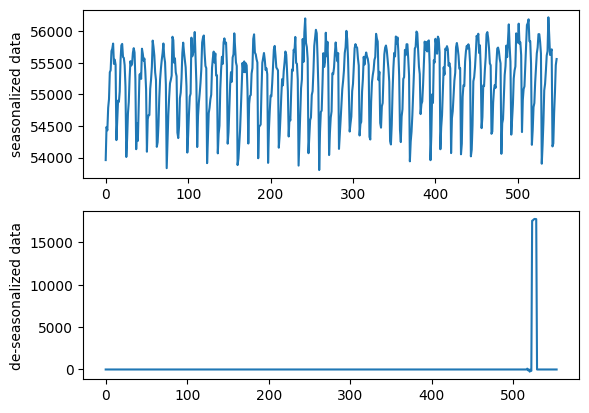

In [170]:
plt.subplot(2, 1, 1)
plt.ylabel("seasonalized data")
plt.plot(np.mean(zg[::10], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.ylabel("de-seasonalized data")
plt.plot(np.mean(zg_mean[::10], axis=(1, 2)))
plt.show()

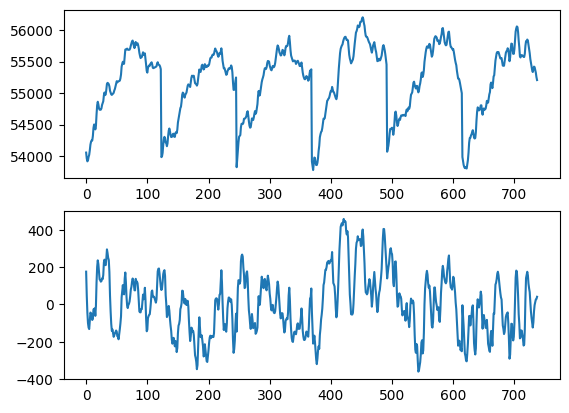

In [66]:
# year 1995-2000 compared between normal data and de-seasonalized data

year_start = datetime(year=1995, month=1, day=1)
year_end = datetime(year=2000, month=12, day=31)

date_mask = (time >= year_start) & (time <= year_end)

plt.subplot(2, 1, 1)
plt.plot(np.mean(zg[date_mask], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.plot(np.mean(zg_mean[date_mask], axis=(1, 2)))

plt.show()

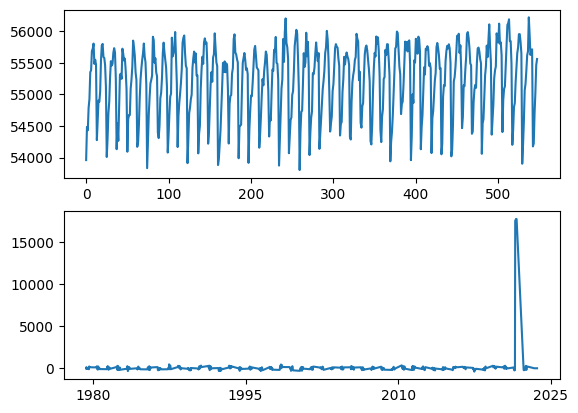

In [67]:
# whole data plotted to look at long-term trends for mean of whole grid

plt.subplot(2, 1, 1)
plt.plot(np.mean(zg[::10], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.plot(time[::10], np.mean(zg_mean[::10], axis=(1, 2)))

plt.show()

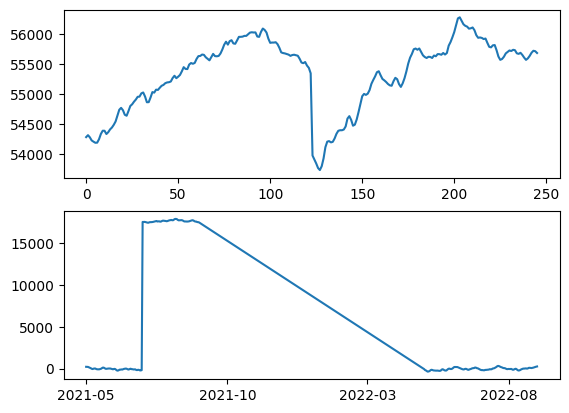

2021-05-01 09:00:00 205.5288005079688
2021-05-02 09:00:00 203.42931057531032
2021-05-03 09:00:00 193.38139184818993
2021-05-04 09:00:00 146.62532259180594
2021-05-05 09:00:00 94.97809682269406
2021-05-06 09:00:00 40.24206468832703
2021-05-07 09:00:00 -29.63632225567028
2021-05-08 09:00:00 -64.08872342225031
2021-05-09 09:00:00 -18.27704889767373
2021-05-10 09:00:00 2.550733391107117
2021-05-11 09:00:00 -3.3432997632777117
2021-05-12 09:00:00 -67.40290930511857
2021-05-13 09:00:00 -91.67717335068393
2021-05-14 09:00:00 -97.26711666609553
2021-05-15 09:00:00 -96.61850577160376
2021-05-16 09:00:00 -69.53318545407905
2021-05-17 09:00:00 -32.77979419340653
2021-05-18 09:00:00 44.118700446958506
2021-05-19 09:00:00 108.93757189041918
2021-05-20 09:00:00 103.61545755752327
2021-05-21 09:00:00 41.97611560705541
2021-05-22 09:00:00 -29.32181111795118
2021-05-23 09:00:00 -35.66468229002451
2021-05-24 09:00:00 -12.296509996498838
2021-05-25 09:00:00 0.20204472764532905
2021-05-26 09:00:00 2.06293

In [69]:
year_start = datetime(year=2021, month=1, day=1)
year_end = datetime(year=2022, month=10, day=1)

date_mask = (time >= year_start) & (time <= year_end)

plt.subplot(2, 1, 1)
plt.plot(np.mean(zg[date_mask], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.plot(time[date_mask], np.mean(zg_mean[date_mask], axis=(1, 2)))

plt.show()

for x, y in zip(time[date_mask], np.mean(zg_mean[date_mask], axis=(1,2))):
    print(x, y)

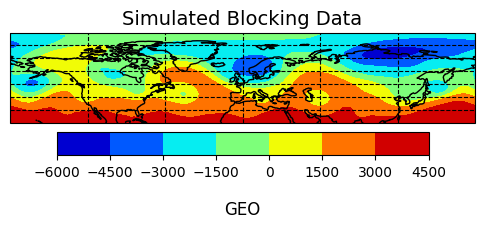

In [23]:
# plot observational data onto worldmap

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

plt.contourf(long[:], lat[:], zg_mean[0], transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Simulated Blocking Data', size=14)
cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('GEO',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

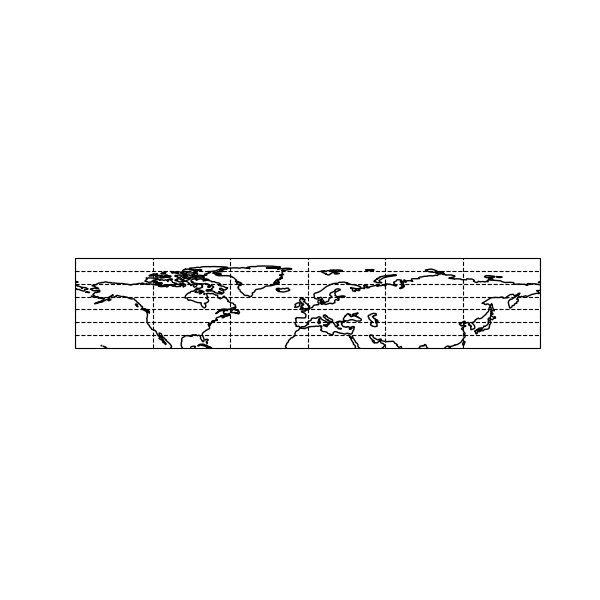

: 

In [4]:
# Set the figure size, projection, and extent
from matplotlib import animation

def update(frame):
    ax.clear()
    ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
    ax.coastlines(resolution="110m",linewidth=1)
    ax.gridlines(linestyle='--',color='black')
    d = ground_truth_data.variables['z_0001'][frame]
    plt.title("Frame: " + str(frame))
    plt.contourf(long, lat, d, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

# plt.title('Simulated Blocking Data', size=14)
# cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
# cb.set_label('GEO',size=12,rotation=0,labelpad=15)
# cb.ax.tick_params(labelsize=10)

an = animation.FuncAnimation(fig, update, frames=len(ground_truth_data.variables["time"]), interval=1200)
plt.show()
